# The Normal Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42) #Persistance in randomness.

We start by generating a dataset.

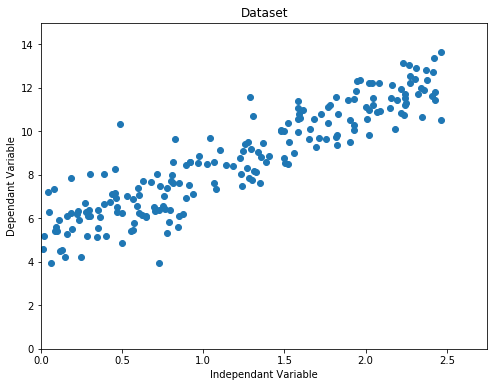

In [2]:
X = 2.5 * np.random.rand(200, 1)
y = 5 + 3 * X + np.random.randn(200, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("Independant Variable")
plt.ylabel("Dependant Variable")
plt.axis([0, 2.75, 0, 15])
plt.show()

We will then use the **Normal Equation** to calculate theta (Slope and Intercept of our model).

$\LARGE\theta =\left( X^{T}X\right) ^{-1}\cdot \left( X^{T}y\right)$



In [3]:
def normal_equation(X, y):
    theta = np.linalg.inv(X.T @ X) @ (X.T @ y) # @ operator = Dot product
    return theta

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42) # Split the dataset

n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape
X_b_train = np.c_[np.ones((n_samples)), X_train]
X_b_test = np.c_[np.ones((n_samples_test)), X_test]

theta = normal_equation(X_b_train, y_train)
print(theta)

[[5.11942266]
 [2.99080252]]


The actual function that we used to generate the data is $\large y = 5+3x_i+\textrm{Gaussian noise}$  
We found $\large\theta_0 = 5.11$ and $\large\theta_1 = 2.99$.  
Not too bad right ?  
  
Now let's make some predictions using theta.
We do that by applying a dot product between the X values and theta:

In [5]:
predict_test = X_b_test @ theta

Let's plot the results!

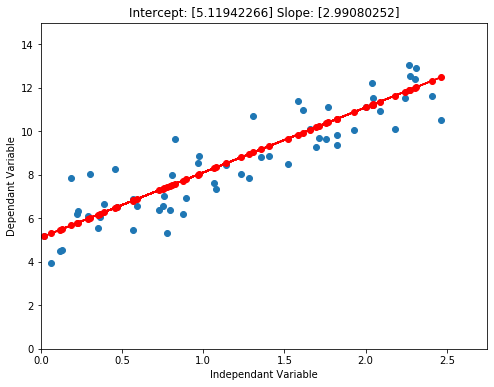

In [6]:
fig = plt.figure(figsize=(8,6))
plt.title(f'Intercept: {theta[0]} Slope: {theta[1]}')
plt.scatter(X_test, y_test)
plt.xlabel("Independant Variable")
plt.ylabel("Dependant Variable")
plt.scatter(X_test, predict_test, color='red')
plt.plot(X_test, predict_test, color='red')
plt.axis([0, 2.75, 0, 15])
plt.show()

## Magic!